# EDA Eurocopa 2024 - Equipos
Luego de la culminación de la Eurocopa 2024, disputada en Alemania, se realizó un análisis de datos de los diversos aspectos del juego. Se trabajó con 9 dataframes distintos que sirvieron para evaluar cómo fue el rendimiento estadístico de los equipos que la disputaron. Los datos se obtuvieron del sitio web FBRef, de lo más completo para trabajar con estadísticas bastante avanzadas en el fútbol.

Para realizar el análisis de datos y la visualización, importamos las siguientes librerías:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

Importamos datos de diversas estadísticas utilizando la función pd.read_html de pandas, que permite extraer tablas de una página web.



In [2]:
df_estandar_list = pd.read_html('https://fbref.com/es/comps/676/stats/Estadisticas-de-UEFA-Euro')
df_arqueros_list = pd.read_html('https://fbref.com/es/comps/676/keepersadv/Estadisticas-de-UEFA-Euro')
df_tiros_list = pd.read_html('https://fbref.com/es/comps/676/shooting/Estadisticas-de-UEFA-Euro')
df_pases_list = pd.read_html('https://fbref.com/es/comps/676/passing/Estadisticas-de-UEFA-Euro')
df_tipo_pases_list = pd.read_html('https://fbref.com/es/comps/676/passing_types/Estadisticas-de-UEFA-Euro')
df_creacion_list = pd.read_html('https://fbref.com/es/comps/676/gca/Estadisticas-de-UEFA-Euro')
df_defensiva_list = pd.read_html('https://fbref.com/es/comps/676/defense/Estadisticas-de-UEFA-Euro')
df_posesion_list = pd.read_html('https://fbref.com/es/comps/676/possession/Estadisticas-de-UEFA-Euro')
df_tiempo_list = pd.read_html('https://fbref.com/es/comps/676/playingtime/Estadisticas-de-UEFA-Euro')
df_diversas_list = pd.read_html('https://fbref.com/es/comps/676/misc/Estadisticas-de-UEFA-Euro')

Como vamos a trabajar con el primer DataFrame de la lista de las tablas que extrajimos, seleccionamos el primer índice de cada una de las variables.



In [3]:
#Seleccionar el primer dataframe

creacion = df_creacion_list[0]
defensivo = df_defensiva_list[0]
estandar = df_estandar_list[0]
minutos = df_tiempo_list[0]
pases = df_pases_list[0]
porteros = df_arqueros_list[0]
posesion = df_posesion_list[0]
remates = df_tiros_list[0]
tipo_pases = df_tipo_pases_list[0]

In [4]:
creacion.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 ACT         \
              Equipo                 PL               90 s ACT  SCA90   
0         al Albania                 19                3.0  56  18.67   
1         at Austria                 19                4.0  86  21.50   
2         be Belgium                 18                4.0  96  24.00   
3         hr Croatia                 19                3.0  78  26.00   
4         cz Czechia                 21                3.0  72  24.00   

  Tipos de SCA                           ACG       Tipos de GCA           \
      PassLive PassDead HASTA Dis FR Def ACG GCA90     PassLive PassDead   
0           41        4     1   4  4   2   4  1.33            4        0   
1           63       10     7   3  3   0  11  2.75            7        0   
2           73        8     8   4  2   1   2  0.50            2        0   
3           60        1     7   8  1   1   3  1.00            2        0   
4           51        8     2   9  1   1   4  1.33            1        0   

                    
  HASTA Dis FR Def  
0     0   0  0   0  
1     2   1  1   0  
2     0   0  0   0  
3     0   1  0   0  
4     0   3  0   0

In [5]:
defensivo.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Derribos       \
              Equipo                 PL               90 s      Tkl TklG   
0         al Albania                 19                3.0       36   21   
1         at Austria                 19                4.0       73   39   
2         be Belgium                 18                4.0       53   33   
3         hr Croatia                 19                3.0       46   34   
4         cz Czechia                 21                3.0       47   32   

                               Desafíos                   Bloqueos            \
  3.º def. 3.º cent. 3.º ataq.      Tkl Att  Tkl% Pérdida Bloqueos Dis Pases   
0       18        12         6       21  52  40.4      31       35  15    20   
1       27        33        13       37  74  50.0      37       51  16    35   
2       22        22         9       15  35  42.9      20       39  10    29   
3       23        17         6       17  37  45.9      20       40  16    24   
4       27        12         8       29  60  48.3      31       32  15    17   

  Unnamed: 15_level_0 Unnamed: 16_level_0 Unnamed: 17_level_0  \
                  Int             Tkl+Int               Desp.   
0                  35                  71                  70   
1                  34                 107                  71   
2                  18                  71                  68   
3                  37                  83                  41   
4                  16                  63                  71   

  Unnamed: 18_level_0  
                  Err  
0                   0  
1                   1  
2                   5  
3                   1  
4                   1

In [6]:
estandar.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Equipo                 PL               Edad               Pos.   
0         al Albania                 19               27.0               35.7   
1         at Austria                 19               27.0               52.8   
2         be Belgium                 18               27.8               55.0   
3         hr Croatia                 19               28.6               55.7   
4         cz Czechia                 21               26.8               40.7   

  Tiempo Jugado                   Rendimiento      ... Por 90 Minutos        \
             PJ Titular  Mín 90 s        Gls. Ass  ...           Gls.   Ast   
0             3      33  270  3.0           3   1  ...           1.00  0.33   
1             4      44  360  4.0           6   5  ...           1.50  1.25   
2             4      44  360  4.0           2   1  ...           0.50  0.25   
3             3      33  270  3.0           2   1  ...           0.67  0.33   
4             3      33  270  3.0           3   2  ...           1.00  0.67   

                                                        
    G+A  G-TP G+A-TP    xG   xAG xG+xAG  npxG npxG+xAG  
0  1.33  1.00   1.33  0.81  0.53   1.34  0.81     1.34  
1  2.75  1.25   2.50  1.73  1.31   3.04  1.53     2.85  
2  0.75  0.50   0.75  1.12  0.78   1.89  1.12     1.89  
3  1.00  0.67   1.00  1.89  1.17   3.07  1.35     2.52  
4  1.67  1.00   1.67  1.69  1.06   2.74  1.69     2.74  

[5 rows x 32 columns]

In [7]:
minutos.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Tiempo Jugado       \
              Equipo                 PL               Edad            PJ  Mín   
0         al Albania                 19               27.0             3  270   
1         at Austria                 19               27.0             4  360   
2         be Belgium                 18               27.8             4  360   
3         hr Croatia                 19               28.6             3  270   
4         cz Czechia                 21               26.8             3  270   

                   Titular              ...                    Sup.  \
  Mn/PJ % min 90 s Titular Mn/arranque  ... Partidos como sustituto   
0    90   100  3.0      33          84  ...                      32   
1    90   100  4.0      44          79  ...                      39   
2    90   100  4.0      44          84  ...                      34   
3    90   100  3.0      33          80  ...                      28   
4    90   100  3.0      33          78  ...                      27   

  Logros del equipo                    Logros del equipo (xG)              \
                PPP onG onGA +/- +/-90                   onxG onxGA xG+/-   
0              0.33   3    5  -2 -0.67                    2.4   5.7  -3.2   
1              1.50   7    6   1  0.25                    6.9   6.3   0.7   
2              1.00   2    2   0  0.00                    4.5   3.4   1.1   
3              0.67   3    6  -3 -1.00                    5.7   4.4   1.3   
4              0.33   3    5  -2 -0.67                    5.1   4.3   0.7   

           
  xG+/-90  
0   -1.07  
1    0.17  
2    0.28  
3    0.44  
4    0.24  

[5 rows x 23 columns]

In [8]:
pases.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Total              \
              Equipo                 PL               90 s   Cmp  Int. % Cmp   
0         al Albania                 19                3.0   953  1185  80.4   
1         at Austria                 19                4.0  1663  2072  80.3   
2         be Belgium                 18                4.0  1878  2214  84.8   
3         hr Croatia                 19                3.0  1547  1779  87.0   
4         cz Czechia                 21                3.0   822  1109  74.1   

                        Cortos       ... Largos Unnamed: 17_level_0  \
  Dist. tot. Dist. prg.    Cmp Int.  ...  % Cmp                 Ass   
0      16789       6195    451  515  ...   51.9                   1   
1      29074       9947    741  829  ...   55.8                   5   
2      32213      10115    867  951  ...   58.4                   1   
3      25202       6943    797  855  ...   58.5                   1   
4      15100       6018    375  425  ...   42.7                   2   

  Unnamed: 18_level_0 Expectativa       Unnamed: 21_level_0  \
                  xAG          xA A-xAG                  PC   
0                 1.6         1.3  -0.6                  24   
1                 5.3         5.3  -0.3                  38   
2                 3.1         4.0  -2.1                  40   
3                 3.5         4.7  -2.5                  32   
4                 3.2         3.2  -1.2                  30   

  Unnamed: 22_level_0 Unnamed: 23_level_0 Unnamed: 24_level_0  \
                  1/3                 PPA                CrAP   
0                  41                  13                   4   
1                 157                  37                  13   
2                 115                  28                   1   
3                 124                  36                  13   
4                  91                  18                   9   

  Unnamed: 25_level_0  
                 PrgP  
0                  61  
1                 176  
2                 132  
3                 124  
4                  80  

[5 rows x 26 columns]

In [9]:
porteros.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Goles           \
              Equipo                 PL               90 s    GC PD TL TE   
0         al Albania                  1                3.0     5  0  0  1   
1         at Austria                  1                4.0     6  0  0  3   
2         be Belgium                  1                4.0     2  0  0  0   
3         hr Croatia                  1                3.0     6  0  0  1   
4         cz Czechia                  2                3.0     5  1  0  0   

       Expectativa           ...       Pases Saques de meta                  \
  GC.1        PSxG PSxG/SoT  ... Long. prom.           Int. %deLanzamientos   
0    1         5.9     0.34  ...        37.0             30            56.7   
1    1         4.8     0.43  ...        30.1             25            24.0   
2    1         2.7     0.20  ...        27.1             42            28.6   
3    0         6.6     0.44  ...        32.7             17            29.4   
4    1         5.0     0.33  ...        38.0             29            58.6   

              Pases cruzados                Barredora                           
  Long. prom.            Opp Stp % de Stp Núm. de OPA Núm. de OPA/90 DistProm.  
0        47.0             49   3      6.1           0           0.00       5.9  
1        25.8             56   3      5.4           5           1.25      16.6  
2        30.1             48   4      8.3           4           1.00      13.8  
3        30.1             35   0      0.0           5           1.67      16.3  
4        46.7             40   3      7.5           0           0.00       7.7  

[5 rows x 28 columns]

In [10]:
posesion.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Equipo                 PL               Pos.               90 s   
0         al Albania                 19               35.7                3.0   
1         at Austria                 19               52.8                4.0   
2         be Belgium                 18               55.0                4.0   
3         hr Croatia                 19               55.7                3.0   
4         cz Czechia                 21               40.7                3.0   

  Toques                                                    ... Transportes  \
  Toques Def. pen. 3.º def. 3.º cent. 3.º ataq. Ataq. pen.  ... Transportes   
0   1467       218      617       634       231         34  ...         837   
1   2505       209      672      1093       757         85  ...        1646   
2   2596       283      875      1118       627        101  ...        1667   
3   2085       190      509      1006       582         77  ...        1228   
4   1434       192      479       535       433         60  ...         784   

                                                            Recepción       
  Dist. tot. Dist. prg. PrgC 1/3 TAP Errores de control Des       Rec PrgR  
0       3916       1907   33  22   6                 30  23       945   60  
1       8022       4330   75  72  16                 51  37      1647  173  
2       7358       3979   75  54  37                 40  30      1864  131  
3       7110       3663   62  56  10                 40  26      1538  124  
4       4201       2117   44  27   6                 41  18       812   80  

[5 rows x 26 columns]

In [11]:
remates.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Estándar          \
              Equipo                 PL               90 s     Gls. Dis DaP   
0         al Albania                 19                3.0        3  33  12   
1         at Austria                 19                4.0        6  50  21   
2         be Belgium                 18                4.0        2  53  19   
3         hr Croatia                 19                3.0        2  42  16   
4         cz Czechia                 21                3.0        3  44  19   

                                                            Expectativa       \
  % de TT   T/90 TalArc/90   G/T G/TalArc  Dist FK TP TPint          xG npxG   
0    36.4  11.00      4.00  0.09     0.25  19.5  1  0     0         2.4  2.4   
1    42.0  12.50      5.25  0.10     0.24  17.1  2  1     1         6.9  6.1   
2    35.8  13.25      4.75  0.04     0.11  17.7  1  0     0         4.5  4.5   
3    38.1  14.00      5.33  0.05     0.13  16.4  0  0     2         5.7  4.0   
4    43.2  14.67      6.33  0.07     0.16  16.5  0  0     0         5.1  5.1   

                        
  npxG/Sh G-xG np:G-xG  
0    0.07  0.6     0.6  
1    0.12 -0.9    -1.1  
2    0.09 -2.5    -2.5  
3    0.11 -3.7    -2.0  
4    0.12 -2.1    -2.1

In [12]:
tipo_pases.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Equipo                 PL               90 s               Int.   
0         al Albania                 19                3.0               1185   
1         at Austria                 19                4.0               2072   
2         be Belgium                 18                4.0               2214   
3         hr Croatia                 19                3.0               1779   
4         cz Czechia                 21                3.0               1109   

  Tipos de pases                                          Saques de esquina  \
      Balón vivo Balón muerto  FK  PL Camb. Pcz Lanz.  SE            Dentro   
0           1055          124  39   4     9  34    41   6                 6   
1           1895          172  40  11     4  91    76  21                 9   
2           2021          186  41  12    12  48    76  21                 8   
3           1662          117  37   8     9  55    49   5                 3   
4            976          131  31   2     4  69    49  14                 2   

              Resultados              
  Fuera Rect.        Cmp PA Bloqueos  
0     0     0        953  6       21  
1    11     0       1663  5       48  
2     4     1       1878  7       30  
3     0     0       1547  0       27  
4     9     0        822  2       28

Eliminamos el nivel superior (nivel 0) de las columnas de varios DataFrames. Esto es útil cuando las columnas tienen un MultiIndex, y queremos simplificar la estructura de las columnas.



In [13]:
creacion.columns = creacion.columns.droplevel(0)
defensivo.columns = defensivo.columns.droplevel(0)
estandar.columns = estandar.columns.droplevel(0)
minutos.columns = minutos.columns.droplevel(0)
pases.columns = pases.columns.droplevel(0)
porteros.columns = porteros.columns.droplevel(0)
posesion.columns = posesion.columns.droplevel(0)
remates.columns = remates.columns.droplevel(0)
tipo_pases.columns = tipo_pases.columns.droplevel(0)

Creamos una lista de DataFrames para utilizarlas en diferentes funciones.



In [14]:
#Crear una lista de df para utilizarlas en diferentes funciones

lista_dataframes = [creacion, defensivo, estandar, minutos, pases, porteros, posesion, remates, tipo_pases]

Iteramos sobre una lista de DataFrames y modificamos los nombres de las columnas repetidas para asegurar que cada columna tenga un nombre único. Esto es especialmente útil cuando se combinan o se manejan múltiples conjuntos de datos que pueden tener nombres de columnas duplicados. En este caso, se mezclaban las variables que contabilizaban la totalidad de las acciones con el promedio por partido.

In [15]:
for i, df in enumerate(lista_dataframes):

    # Cambiar nombres de columnas repetidas
    col_count = {}
    new_columns = []

    for col in df.columns:
        if col in col_count:
            col_count[col] += 1
            new_columns.append(f'{col}_{col_count[col]}')
        else:
            col_count[col] = 0
            new_columns.append(col)

    df.columns = new_columns

Generamos la función 'split_equipos', que se utiliza para eliminar las abreviaturas y mantener solo los nombres completos de los equipos en una columna específica de un DataFrame. Por ejemplo, convierte "fr France" en "France".

In [16]:
#Función para eliminar las abreviaturas a los nombres de equipos. Ejemplo: fr France

def split_equipos(df, columna):
    # Aplicar la operación sobre cada fila de la columna
    df[columna] = df[columna].apply(lambda x: x.split(maxsplit=1)[1] if isinstance(x, str) else x)
    return df

In [17]:
split_equipos(creacion, 'Equipo')
split_equipos(defensivo, 'Equipo')
split_equipos(estandar, 'Equipo')
split_equipos(minutos, 'Equipo')
split_equipos(pases, 'Equipo')
split_equipos(porteros, 'Equipo')
split_equipos(posesion, 'Equipo')
split_equipos(remates, 'Equipo')
split_equipos(tipo_pases, 'Equipo')

,Equipo,PL,90 s,Int.,Balón vivo,Balón muerto,FK,PL_1,Camb.,Pcz,Lanz.,SE,Dentro,Fuera,Rect.,Cmp,PA,Bloqueos
0,Albania,19,3.0,1185,1055,124,39,4,9,34,41,6,6,0,0,953,6,21
1,Austria,19,4.0,2072,1895,172,40,11,4,91,76,21,9,11,0,1663,5,48
2,Belgium,18,4.0,2214,2021,186,41,12,12,48,76,21,8,4,1,1878,7,30
3,Croatia,19,3.0,1779,1662,117,37,8,9,55,49,5,3,0,0,1547,0,27
4,Czechia,21,3.0,1109,976,131,31,2,4,69,49,14,2,9,0,822,2,28
5,Denmark,19,4.0,2353,2192,153,38,2,18,77,52,27,12,9,3,1977,8,25
6,England,21,7.7,4503,4187,305,98,10,38,115,116,24,10,11,0,3924,11,50
7,France,18,6.3,3439,3187,247,73,6,31,117,95,34,11,13,0,3010,5,50
8,Georgia,20,4.0,1407,1229,177,54,0,14,48,53,14,12,2,0,1110,1,18
9,Germany,23,5.3,3400,3174,214,70,14,8,121,77,36,10,15,3,2992,12,35


Para trabajar con datos específicos, seleccionamos las columnas relevantes de cada DataFrame y, si es necesario, modificamos los nombres de las columnas para que sean consistentes y descriptivos. Las columnas tenían ciertas abreviaturas que no podían ser interpretadas claramente.



In [18]:
#Elegir las columnas de cada dataframe con las que voy a trabajar y modificar -de ser necesario- las columnas

dataframes_dict = {
    'creacion': creacion,
    'defensivo': defensivo,
    'estandar': estandar,
    'minutos': minutos,
    'pases': pases,
    'porteros': porteros,
    'posesion': posesion,
    'remates': remates,
    'tipo_pases': tipo_pases
}

lista_columnas_df = [['Equipo', 'PL', '90 s', 'ACT', 'SCA90', 'ACG', 'GCA90'],
                     ['Equipo', 'PL', '90 s', 'Int', 'Tkl+Int', 'Desp.', 'Err'],
                     ['Equipo', 'PL', 'Edad', 'Pos.', 'Gls._1', 'Ast', 'G+A_1', 'xG_1', 'xAG_1', 'xG+xAG'],
                     ['Equipo', 'PL', 'Edad', 'PJ', 'Mín', 'Mn/PJ', '% min', '90 s'],
                     ['Equipo', 'PL', '90 s', 'Cmp', 'Int.', '% Cmp', 'Dist. tot.','Dist. prg.',
                      'PC', '1/3', 'PPA', 'PrgP'],
                      ['Equipo', 'PL', '90 s', 'GC', 'PSxG/SoT', '/90', '% de Stp'],
                      ['Equipo', 'PL', '90 s', 'Pos.', 'Toques', '3.º ataq.', 'Transportes', 'Dist. tot.', 'Dist. prg.',
                       '1/3'],
                       ['Equipo', 'PL', '90 s', 'Gls.', 'Dis', 'DaP', '% de TT', 'T/90', 'TalArc/90', 'G/T', 
                         'G/TalArc', 'Dist'],
                         ['Equipo', 'PL', '90 s', 'Int.', 'Balón vivo', 'Balón muerto', 'Cmp', 'Bloqueos']]



nombres_columnas = [['Equipo', 'Número de Jugadores', 'Min / 90', 'Acción para creación de tiros', 
                     'Pases que acaban en un tiro / 90', 'Acción para generar un gol', 'Pases que acaban en gol / 90'],
                     ['Equipo', 'Número de Jugadores', 'Min / 90', 'Intercepciones', 'Tackles + Intercepciones',
                      'Despejes', 'Errores'],
                      ['Equipo', 'Número de Jugadores', 'Min / 90', 'Posesión', 'Goles/90', 'Asistencias/90',
                       'G+A/90', 'xG/90', 'xAG/90', 'xG+xAG/90'],
                       ['Equipo', 'Número de Jugadores', 'Edad', 'PJ', 'Mín', 'Mín/PJ', '% Mín', 'Min / 90'],
                       ['Equipo', 'Número de Jugadores', 'Min / 90', 'Completados', 'Intentados', '% Completados',
                        'Dist. total', 'Distancia en pases progresivos', 'Pases Clave', 'Último Tercio', 'Al área penal', 'Pases Progresivos'],
                        ['Equipo', 'Número de Jugadores', 'Min / 90', 'GC', 'PSxG/SoT', 'PSxG/SoT / 90', '% centros descolgados'],
                        ['Equipo', 'Número de Jugadores', 'Min / 90', 'Posesión', 'Toques', 'Toques en último tercio',
                         'Transportes', 'Distancia total', 'Distancia progresada', 'Transportes al último tercio'],
                         ['Equipo', 'Número de Jugadores', 'Min / 90', 'Goles', 'Disparos', 'DaP', '% de TT', 'T/90', 'TalArc/90', 'G/T', 
                         'G/TalArc', 'Distancia promedio de remates'],
                         ['Equipo', 'Número de Jugadores', 'Min / 90', 'Intentados', 'En movimiento', 'En pelota detenida',
                          'Completados', 'Pases Bloqueados']]

El siguiente bloque de código itera sobre un diccionario de DataFrames, una lista de columnas a mantener y una lista de nuevos nombres de columnas. El objetivo es filtrar las columnas necesarias, renombrarlas, y actualizar tanto el diccionario de DataFrames como las variables globales correspondientes.

In [19]:
# Iterar sobre el diccionario y listas para modificar dataframes in-place
for (df_name, df), columns_to_keep, new_columns in zip(dataframes_dict.items(), lista_columnas_df, nombres_columnas):
    filtered_df = df[columns_to_keep].copy()
    filtered_df.columns = new_columns
    dataframes_dict[df_name] = filtered_df  # Actualizar el diccionario
    globals()[df_name] = filtered_df  # Actualizar la variable global

Actualizamos la lista de DataFrames y generamos una variable 'lista_variables_df' para que contenga los nombres de los DataFrames para utilizarlos en cada impresión dentro de una iteración.

In [20]:
#Actualizar la lista de df para utilizarlas en diferentes funciones

lista_dataframes = [creacion, defensivo, estandar, minutos, pases, porteros, posesion, remates, tipo_pases]

lista_variables_df = ['Creación', 'Defensivo', 'Estándar', 'Minutos',
                      'Pases', 'Porteros', 'Posesión', 'Remates', 'Tipos de Pases']

Iteramos sobre una lista de DataFrames '(lista_dataframes)' y mostramos la información de cada uno utilizando el método 'info()'. Este método proporciona una visión general de los DataFrames, incluyendo el número de entradas, nombres y tipos de columnas, y la cantidad de valores no nulos.

In [21]:
# Info de cada uno de los dataframes

for df in lista_dataframes:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Equipo                            24 non-null     object 
 1   Número de Jugadores               24 non-null     int64  
 2   Min / 90                          24 non-null     float64
 3   Acción para creación de tiros     24 non-null     int64  
 4   Pases que acaban en un tiro / 90  24 non-null     float64
 5   Acción para generar un gol        24 non-null     int64  
 6   Pases que acaban en gol / 90      24 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Equipo                    24 non-null     object 
 1

teramos sobre una lista de DataFrames '(lista_dataframes)' y mostramos un resumen estadístico de cada uno utilizando el método 'describe()'. Este método proporciona estadísticas descriptivas para las columnas numéricas, como la media, desviación estándar, valores mínimos y máximos.

In [22]:
#Analizar cada dataframe
for i, df in enumerate(lista_dataframes):
    print(f'Dataframe: {lista_variables_df[i]}\n', df.describe(), '\n')

Dataframe: Creación
        Número de Jugadores   Min / 90  Acción para creación de tiros  \
count            24.000000  24.000000                      24.000000   
mean             20.541667   4.383333                      98.125000   
std               1.955575   1.411033                      50.806806   
min              18.000000   3.000000                      32.000000   
25%              19.000000   3.000000                      60.000000   
50%              20.000000   4.000000                      82.000000   
75%              21.250000   5.300000                     132.000000   
max              25.000000   7.700000                     228.000000   

       Pases que acaban en un tiro / 90  Acción para generar un gol  \
count                         24.000000                   24.000000   
mean                          21.610000                    7.708333   
std                            5.960766                    6.616706   
min                           10.670000       

El siguiente código realiza dos tareas para analizar los datos nulos en los DataFrames:

*Corroborar Datos Nulos*: Imprime la cantidad de datos nulos en cada columna de cada DataFrame.

*Visualizar Datos Nulos con un Heatmap*: Genera un heatmap que visualiza los datos nulos en cada DataFrame para una evaluación gráfica.

In [23]:
#Corroborar en cada dataframe si hay datos nulos
for i, df in enumerate(lista_dataframes):
    print(f'Dataframe: {lista_variables_df[i]}\n', df.isna().sum(), '\n')

Dataframe: Creación
 Equipo                              0
Número de Jugadores                 0
Min / 90                            0
Acción para creación de tiros       0
Pases que acaban en un tiro / 90    0
Acción para generar un gol          0
Pases que acaban en gol / 90        0
dtype: int64 

Dataframe: Defensivo
 Equipo                      0
Número de Jugadores         0
Min / 90                    0
Intercepciones              0
Tackles + Intercepciones    0
Despejes                    0
Errores                     0
dtype: int64 

Dataframe: Estándar
 Equipo                 0
Número de Jugadores    0
Min / 90               0
Posesión               0
Goles/90               0
Asistencias/90         0
G+A/90                 0
xG/90                  0
xAG/90                 0
xG+xAG/90              0
dtype: int64 

Dataframe: Minutos
 Equipo                 0
Número de Jugadores    0
Edad                   0
PJ                     0
Mín                    0
Mín/PJ              

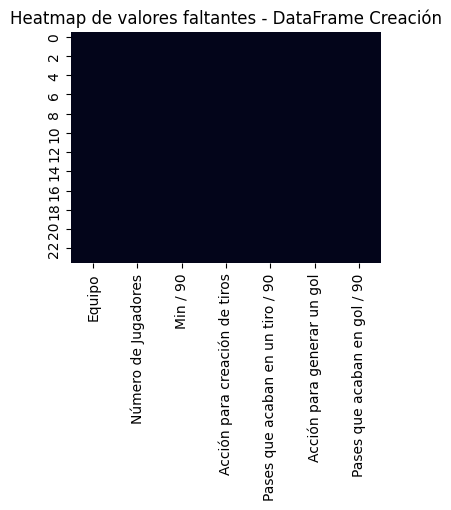

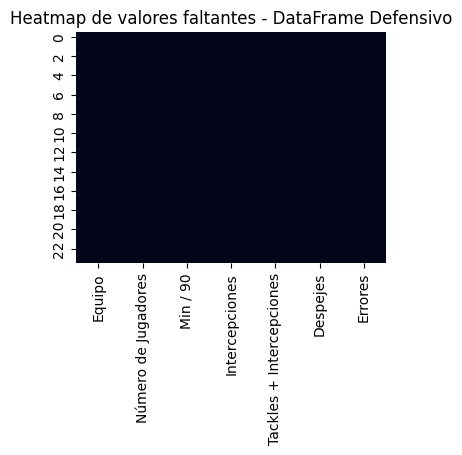

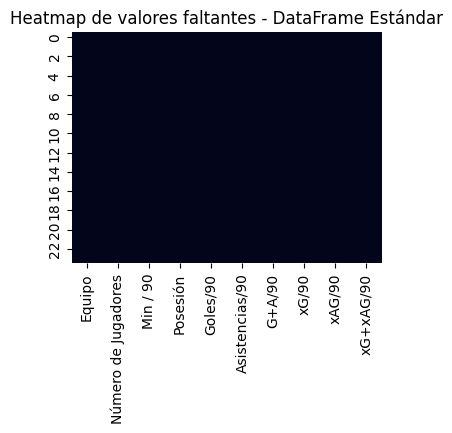

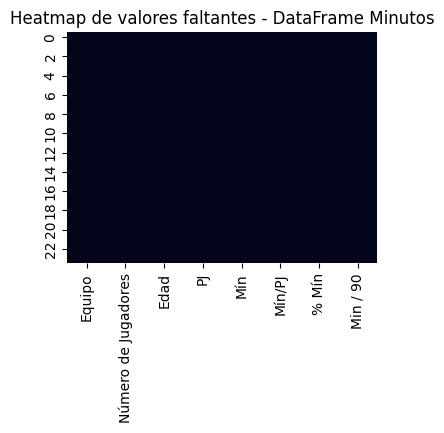

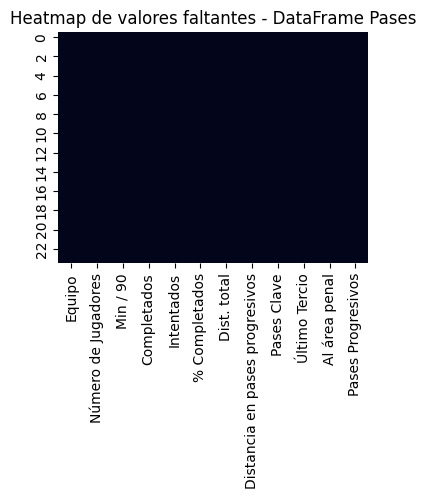

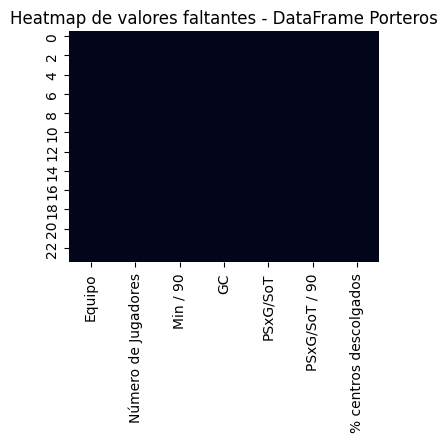

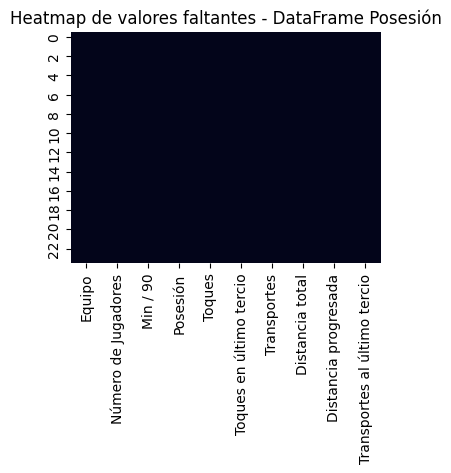

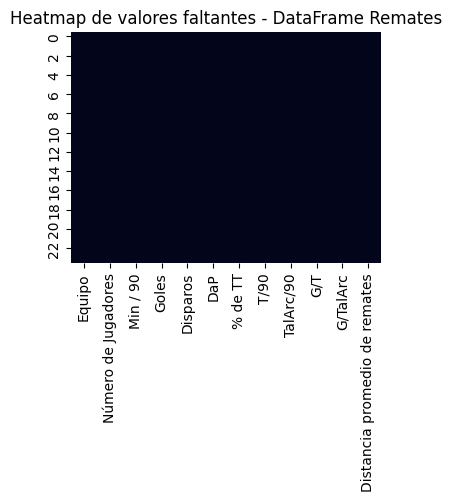

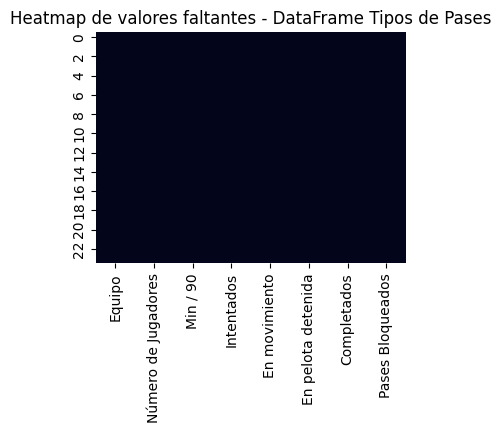

In [24]:
#Corroborar si hay datos nulos con un heatmap

for i, df in enumerate(lista_dataframes):
    plt.figure(figsize=(4, 3))  # Crear una nueva figura para cada heatmap
    sns.heatmap(df.isna(), cbar=False)
    plt.title(f'Heatmap de valores faltantes - DataFrame {lista_variables_df[i]}')
    plt.show()

La siguiente función genera un gráfico de dispersión ('scatter plot') utilizando Plotly Express. Este gráfico visualiza la relación entre dos variables y etiqueta los puntos con los nombres de los jugadores. Como ejemplo, utiliza las intersecciones de dos variables de tres DataFrames distintos para entender distintos tipos de 

In [25]:
# Función para generar gráfico scatter con Plotly
def generar_scatter(data, x, y):
    fig = px.scatter(
        data,
        x=x,
        y=y,
        text='Equipo',  # Usar 'Equipo' para las etiquetas de los puntos
        title=f'{x} vs {y}',
        labels={x: x, y: y}
    )

    # Personalizar el gráfico
    fig.update_traces(marker=dict(size=12, color='blue', opacity=0.7),  textposition='top center', selector=dict(mode='markers+text'))
    fig.update_layout(
        xaxis_title=x,
        yaxis_title=y,
        showlegend=False  # No mostrar la leyenda
    )

    # Mostrar el gráfico
    fig.show()


# Generar gráficos de dispersión
generar_scatter(pases, 'Intentados', 'Completados')
generar_scatter(defensivo, 'Intercepciones', 'Despejes')
generar_scatter(remates, 'T/90', 'TalArc/90')

# Mostrar los gráficos
plt.show()

La siguiente función selecciona los 5 mejores equipos basándose en una columna determinada.



In [26]:
#Función para generar el Top 5 de una columna de un determinado dataframe

def top_5_df(df, column):
    top_5 = df[['Equipo', column]].sort_values(by=column, ascending=False).head(5)
    return top_5

La siguiente función genera gráficos de barras para las columnas de un DataFrame, mostrando los 5 mejores resultados de cada columna especificada en la lista. Los gráficos son creados utilizando Plotly Express.

In [27]:
#Función para graficar cada columna de un dataframe
def barplot_df(df, list_columns):
    # Iterar sobre las columnas y obtener el top 5 de cada una
    top_5_results_df = {}
    for column in df.columns:
        if column != 'Equipo':  # Evitar la columna 'Equipo'
            top_5_results_df[column] = top_5_df(df, column)

    lista_graficos_estandar = list_columns
    for i in lista_graficos_estandar:
        if i in top_5_results_df:
            top_5_column = top_5_results_df[i]
            
            # Crear el gráfico de barras
            fig = px.bar(top_5_column, x=i, y='Equipo', orientation='h', title=f'Top 5 {i}',
                        labels={i: i, 'Equipo': 'Equipo'}, color=i, color_continuous_scale='Viridis')
            fig.show()
        else:
            print(f"La clave {i} no se encuentra en los resultados.")

Definimos los DataFrames y las listas de columnas para las cuales se generarán gráficos de barras. Los DataFrames están organizados en un diccionario, y cada lista de columnas específica se asigna a un DataFrame correspondiente.

In [28]:
#Dataframes y listas de columnas a graficar
dataframes_dict = {
    'creacion': creacion,
    'defensivo': defensivo,
    'estandar': estandar,
    'minutos': minutos,
    'pases': pases,
    'porteros': porteros,
    'posesion': posesion,
    'remates': remates
}
lista_columnas = {'creacion': ['Acción para creación de tiros', 'Pases que acaban en un tiro / 90', 
                               'Acción para generar un gol', 'Pases que acaban en gol / 90'],
                               'defensivo': ['Intercepciones','Tackles + Intercepciones', 'Despejes', 'Errores'],
                               'estandar': ['G+A/90', 'xG/90', 'xAG/90', 'xG+xAG/90'],
                               'pases': ['Pases Clave', 'Último Tercio', 'Pases Progresivos'], 
                               'porteros': ['PSxG/SoT / 90', '% centros descolgados'],
                               'posesion': ['Toques en último tercio', 'Transportes', 'Distancia total','Transporter al último tercio'], 
                               'remates': ['% de TT', 'T/90', 'TalArc/90', 'G/T', 'G/TalArc']}

La siguiente sección muestra cómo iterar sobre el diccionario de DataFrames y listas de columnas para aplicar la función 'barplot_df' a cada DataFrame. Esta función generará gráficos de barras para las columnas especificadas.

In [29]:
# Iterar sobre el diccionario y aplicar la función
for df_name, columns in lista_columnas.items():
    if df_name in dataframes_dict:
        df = dataframes_dict[df_name]
        print(f'\nDATAFRAME: {df_name}')
        barplot_df(df, columns)
    else:
        print(f"El DataFrame '{df_name}' no se encuentra en dataframes_dict.")


DATAFRAME: creacion



DATAFRAME: defensivo



DATAFRAME: estandar



DATAFRAME: pases



DATAFRAME: porteros



DATAFRAME: posesion


La clave Transporter al último tercio no se encuentra en los resultados.

DATAFRAME: remates


Calculamos y visualizamos la matriz de correlación de cada DataFrame utilizando un heatmap. La correlación entre variables numéricas es visualizada para entender las relaciones entre diferentes métricas.

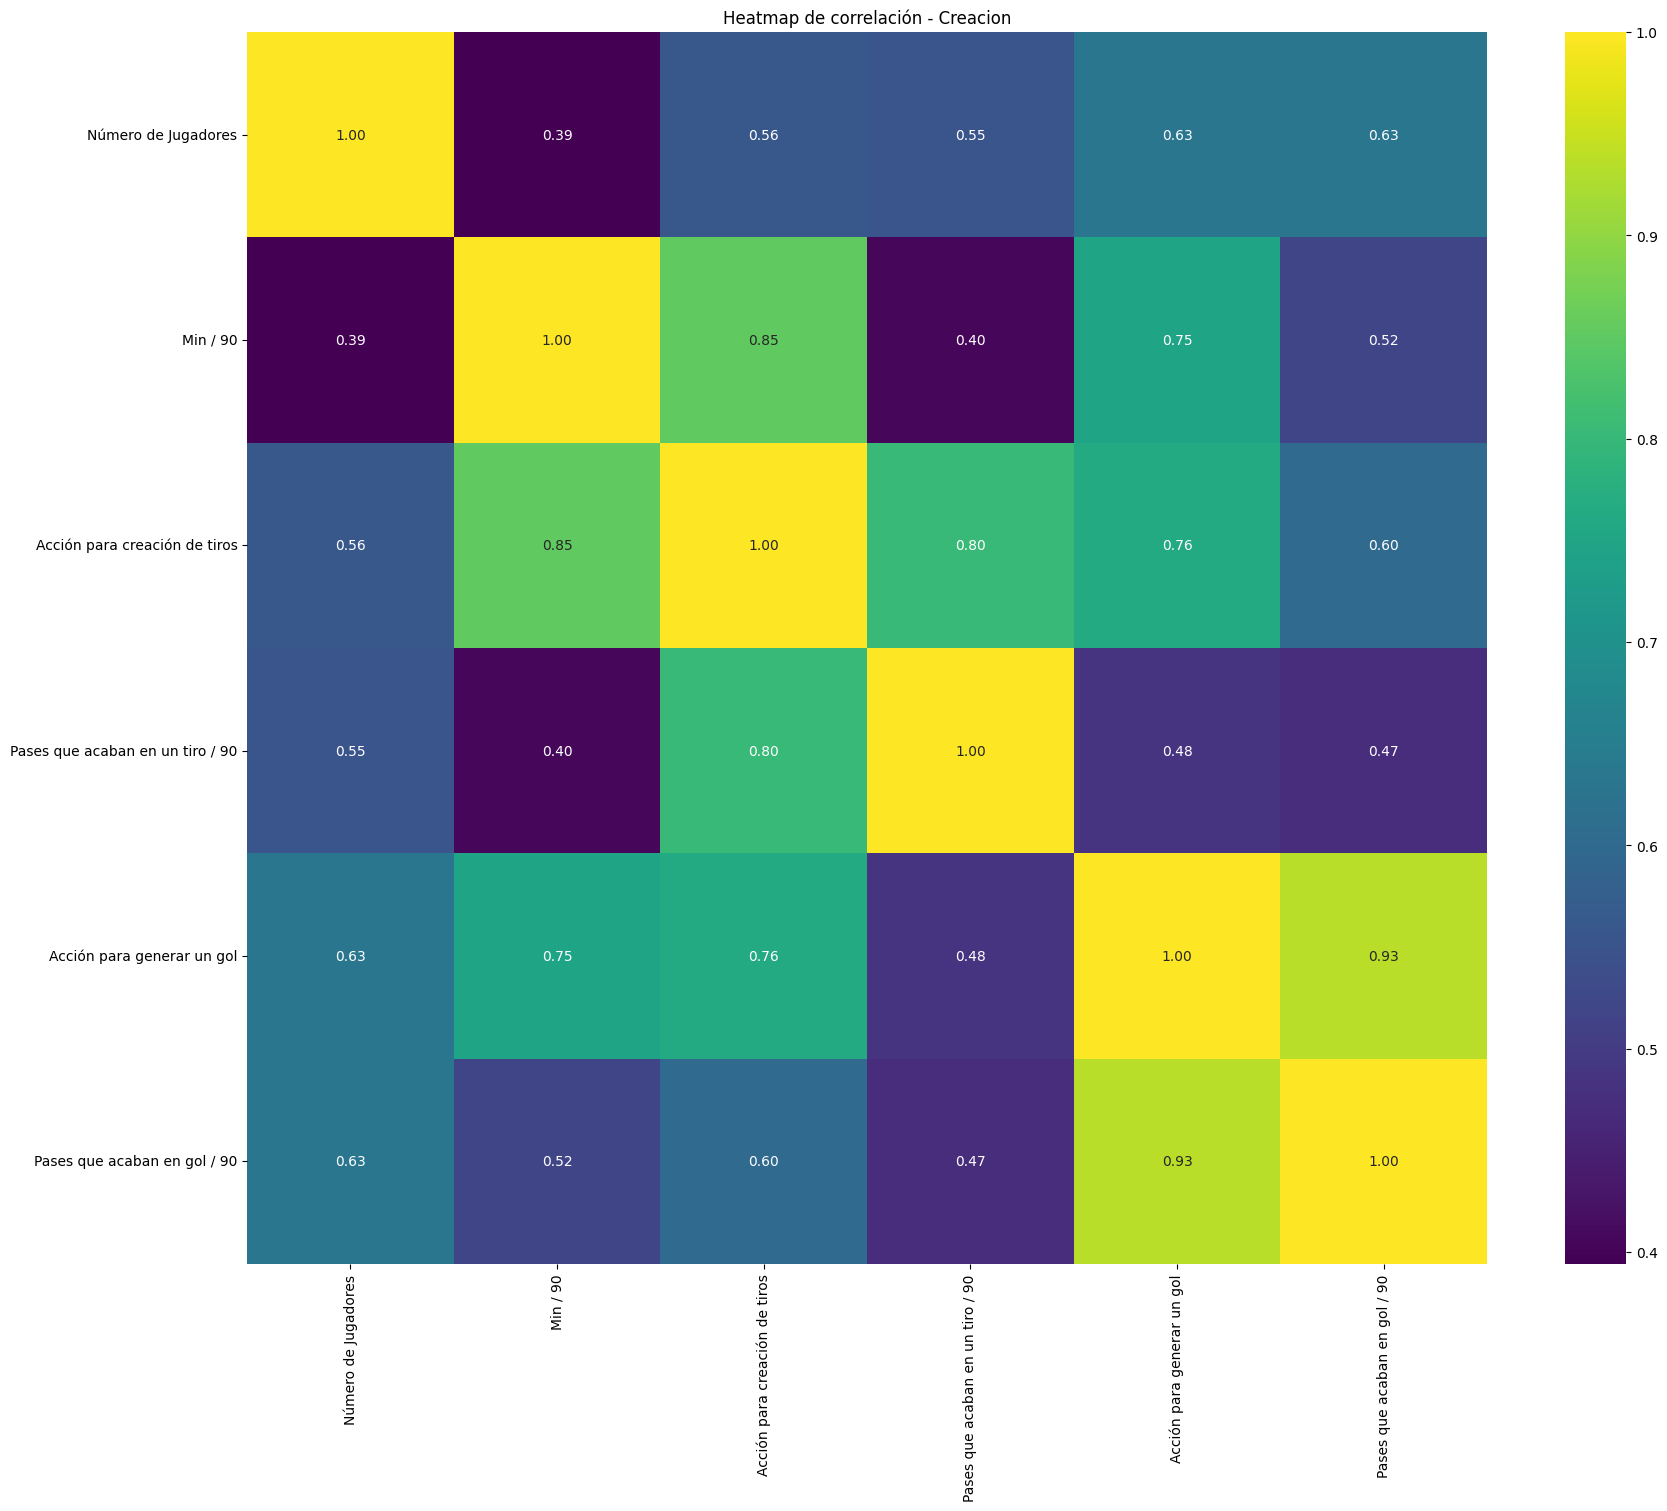

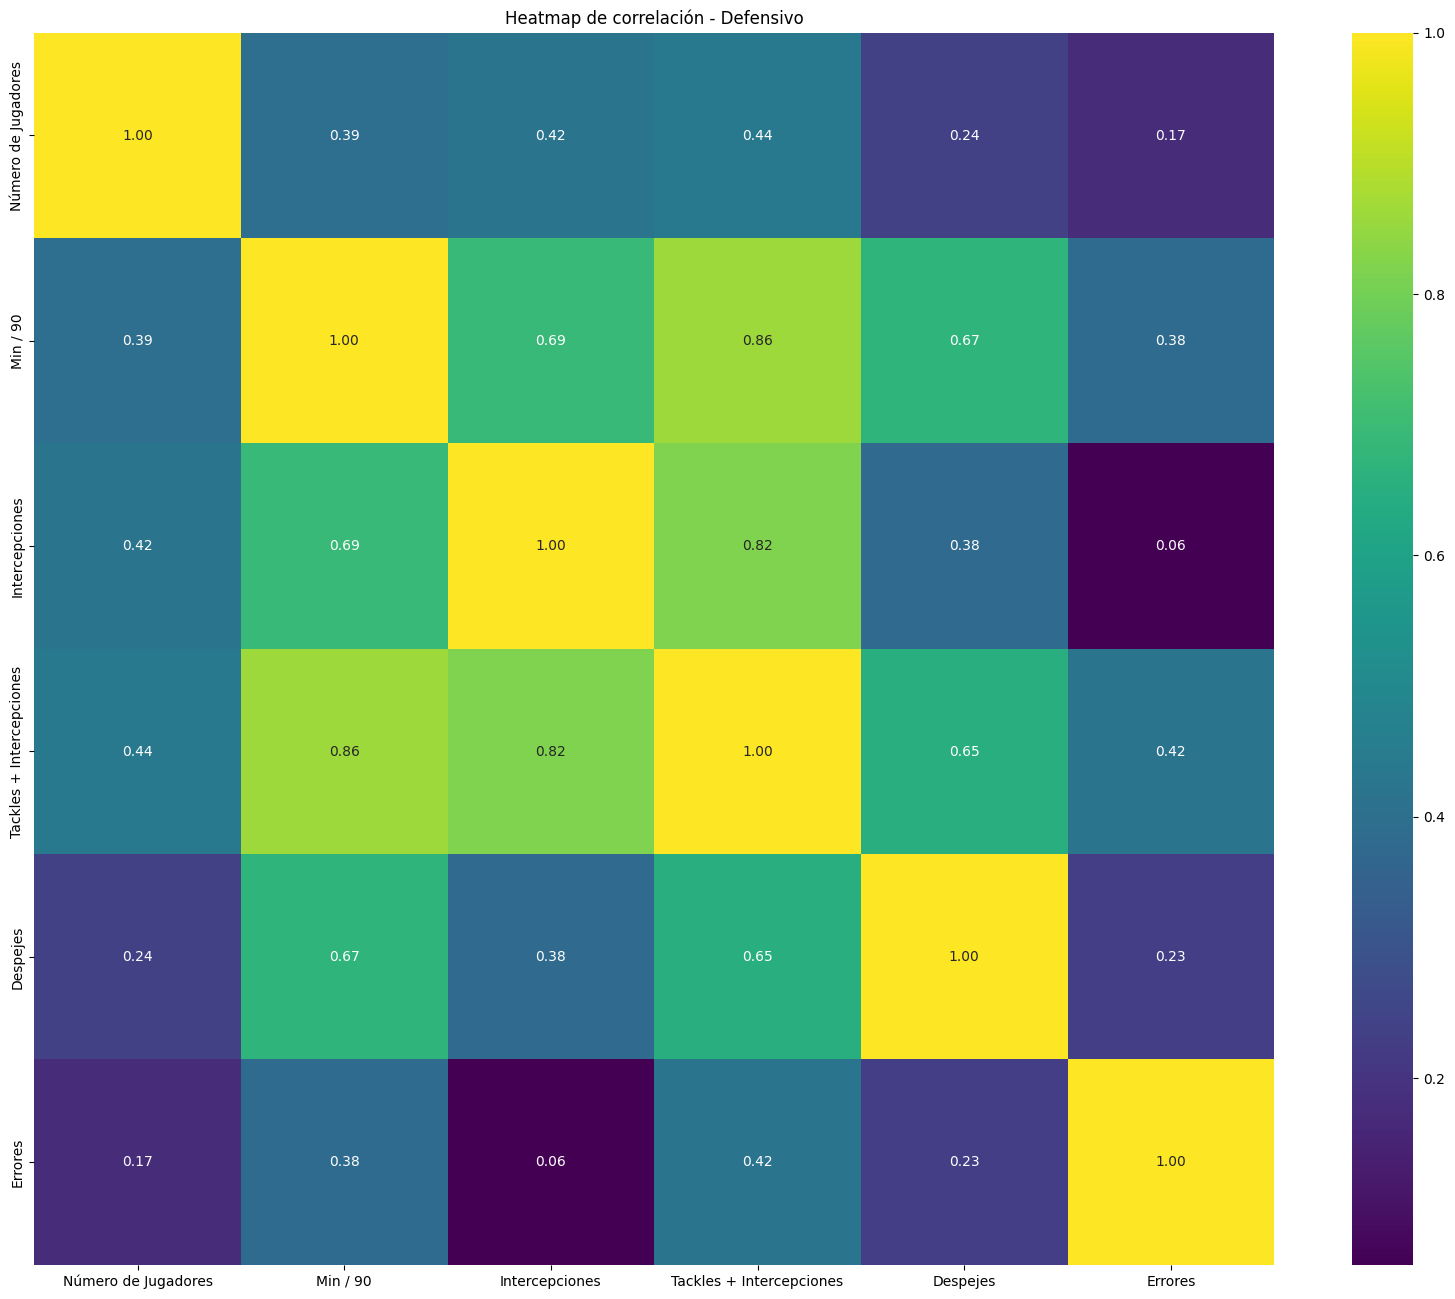

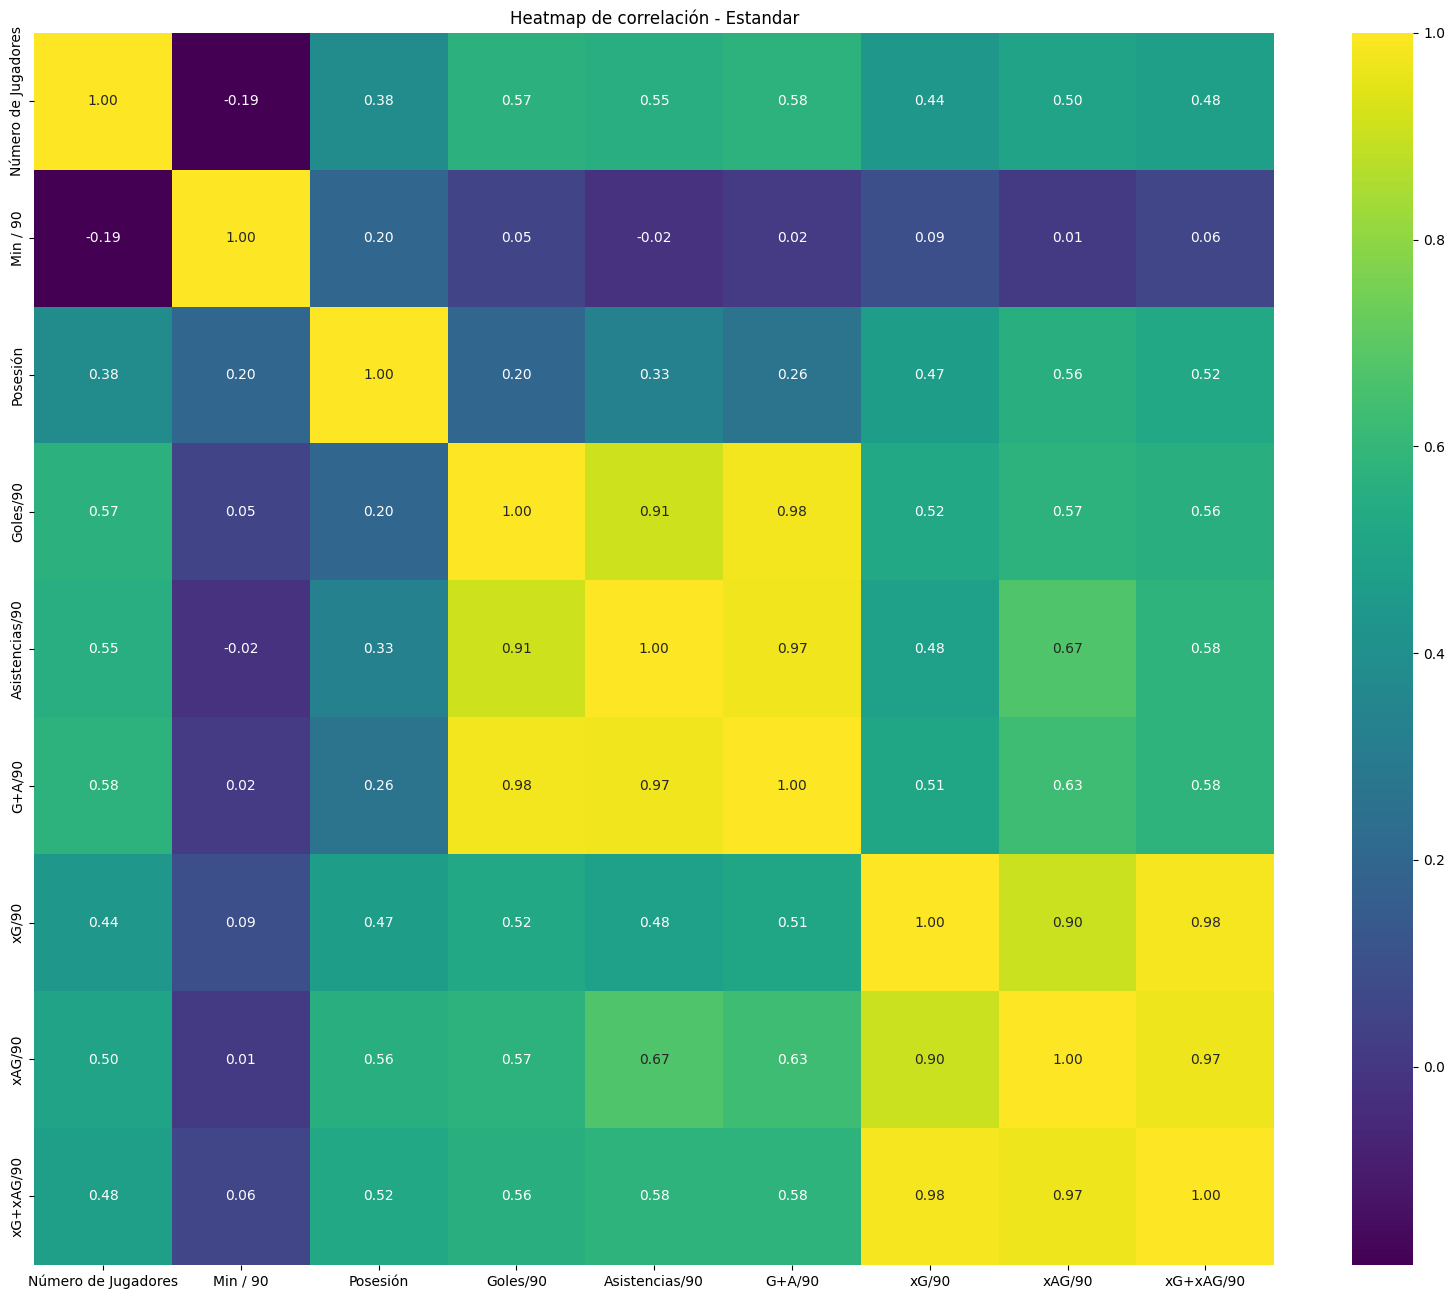

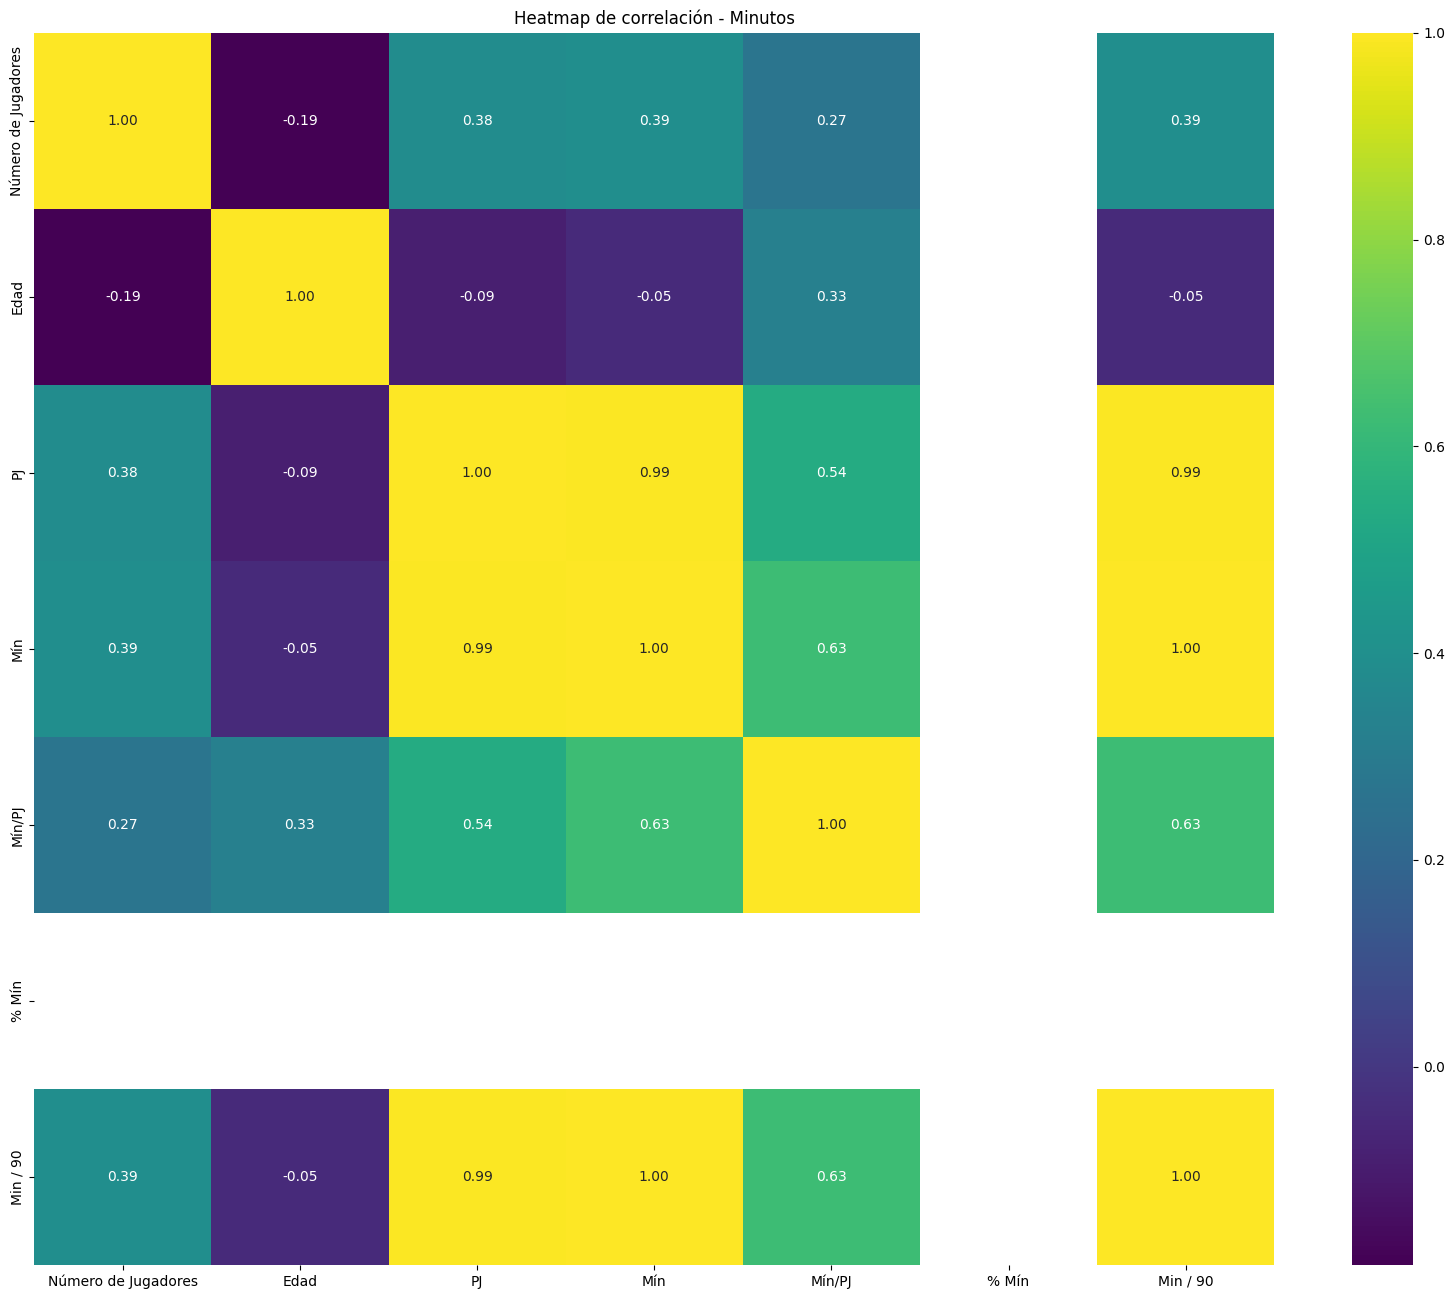

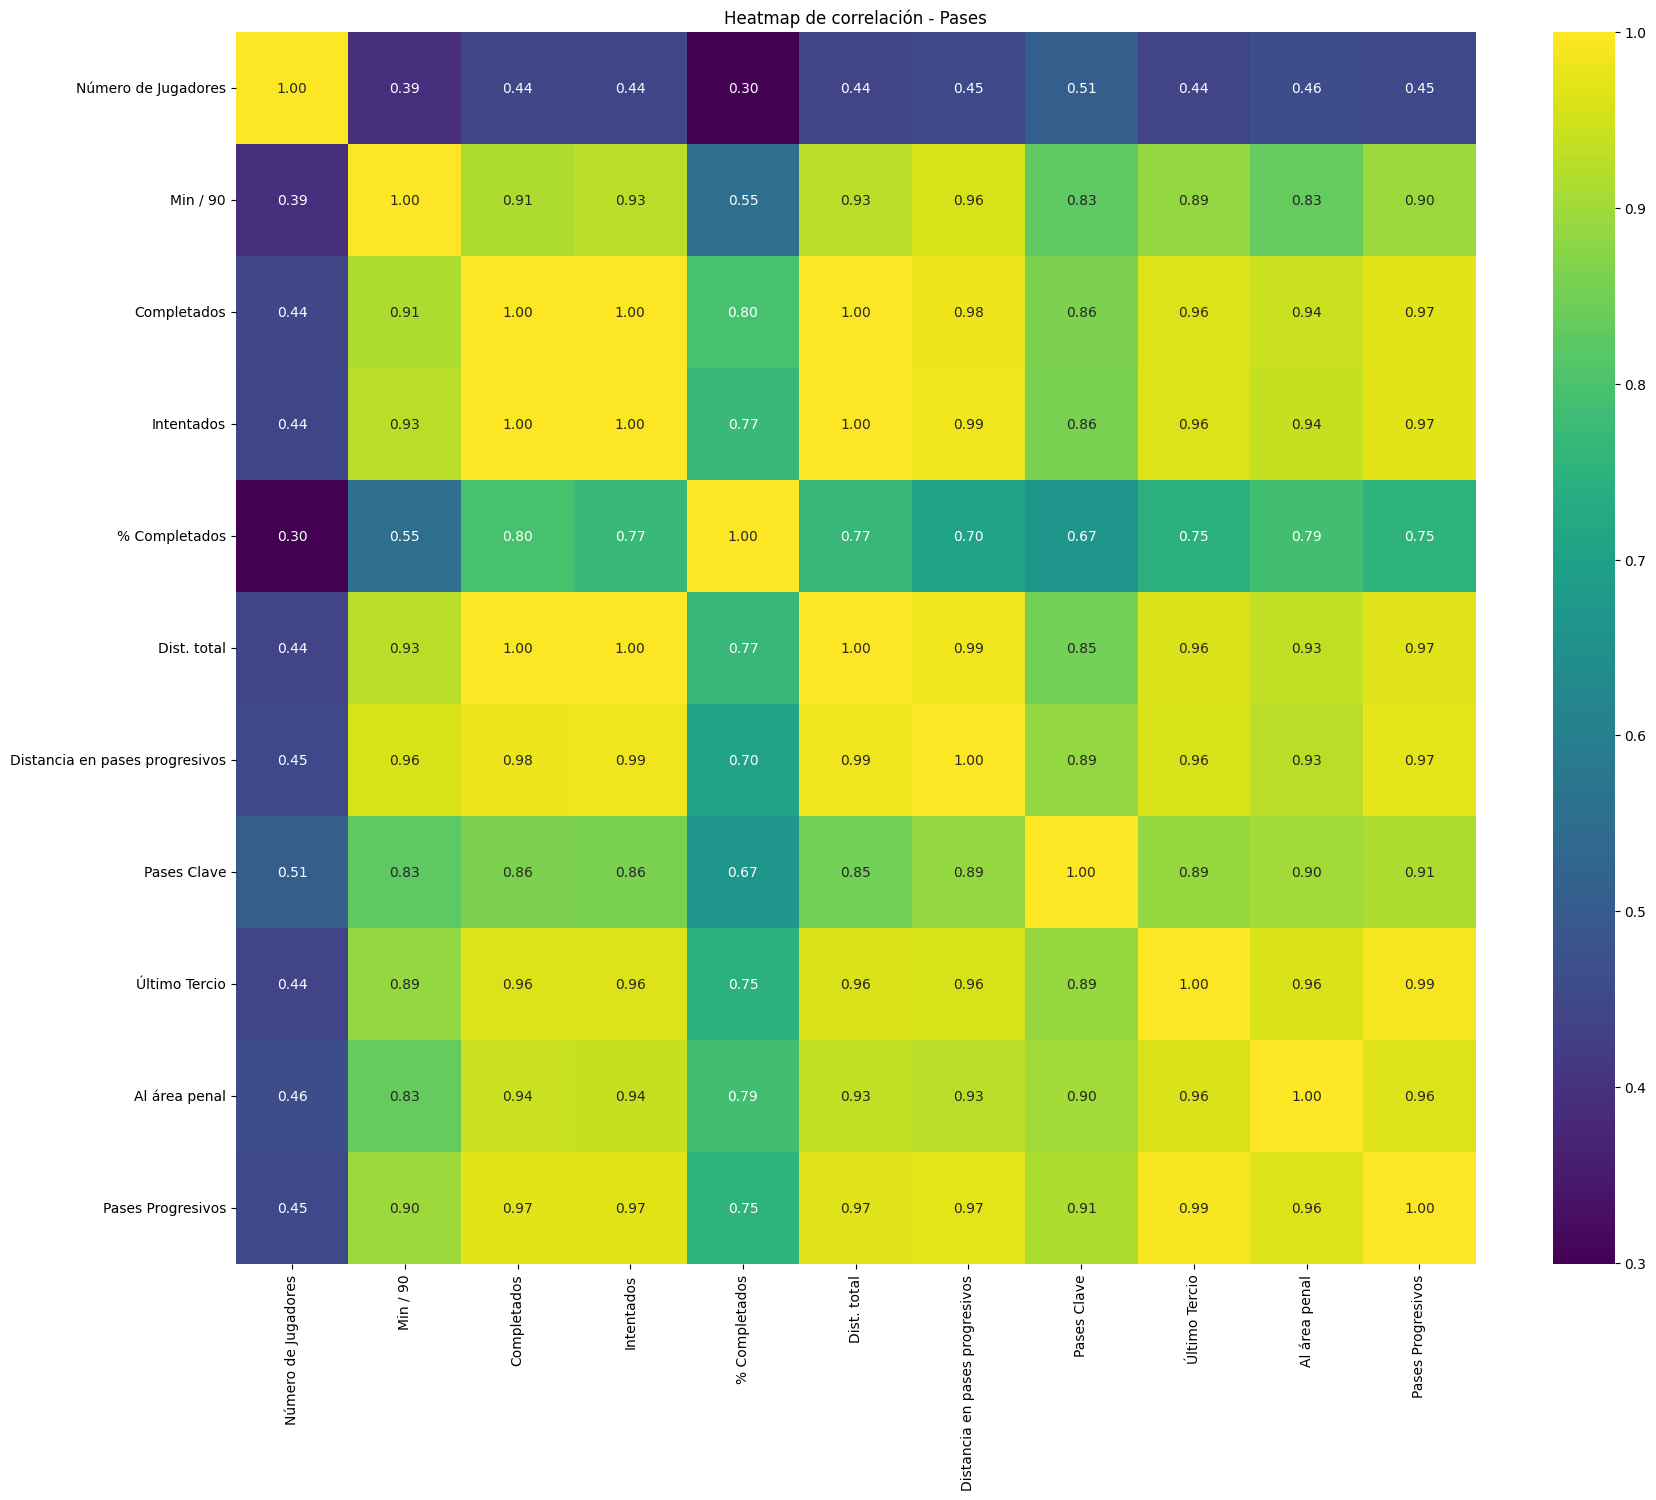

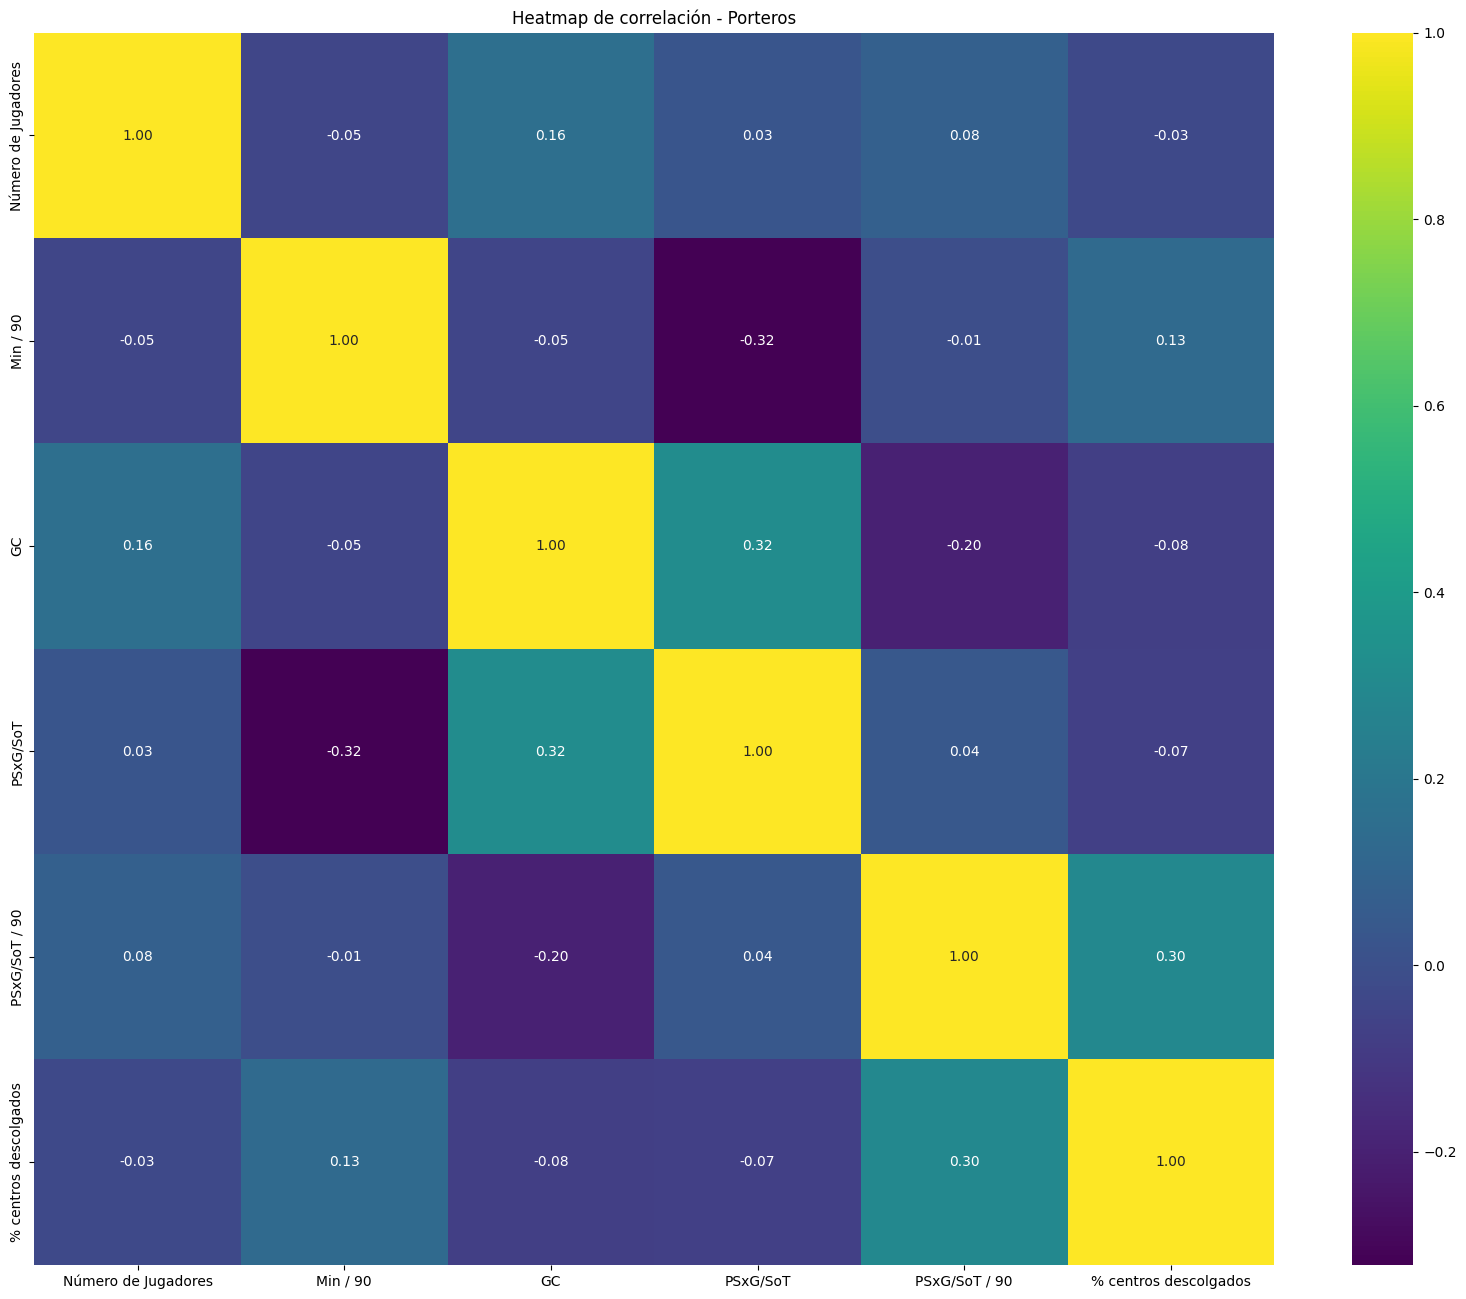

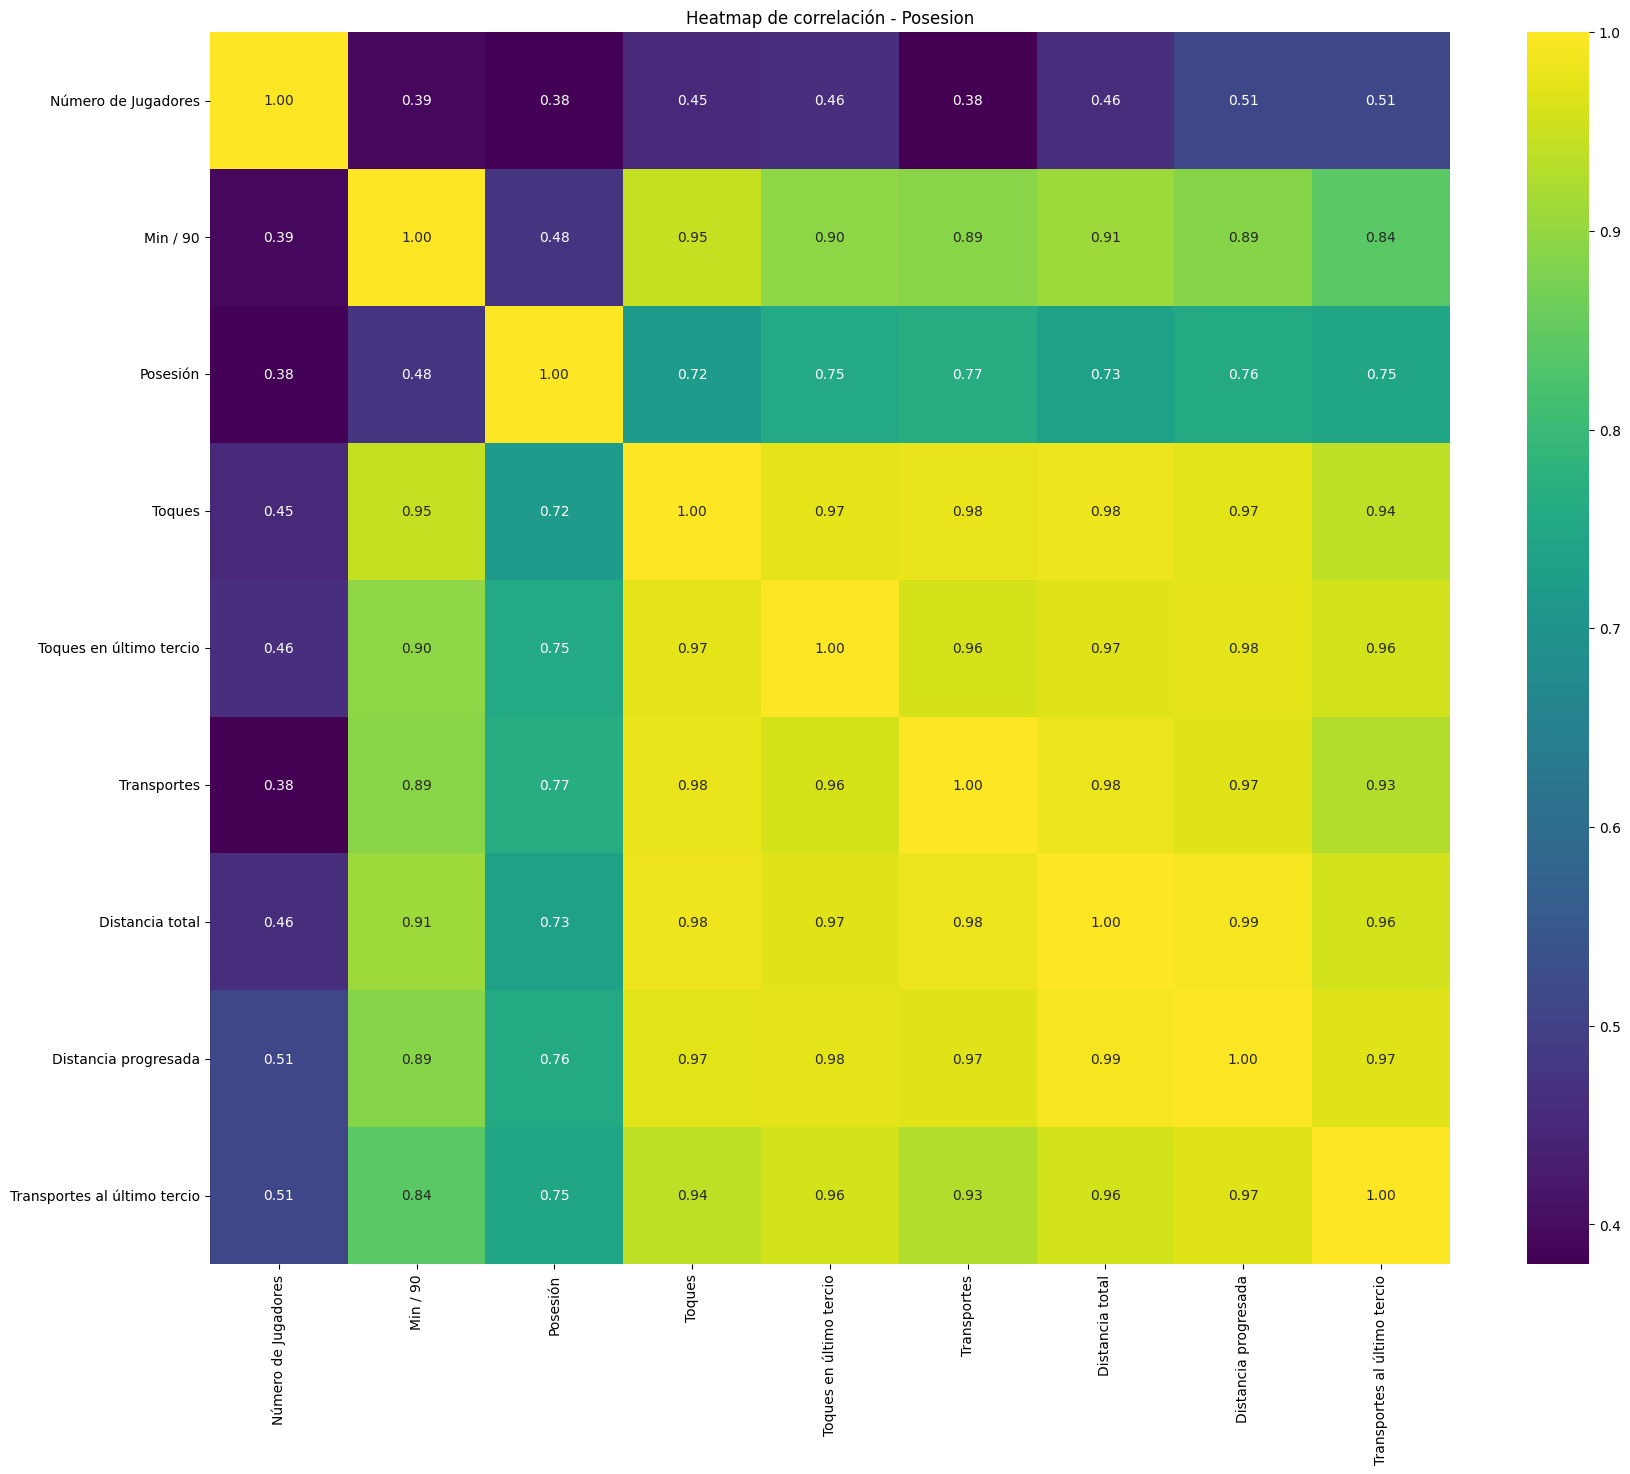

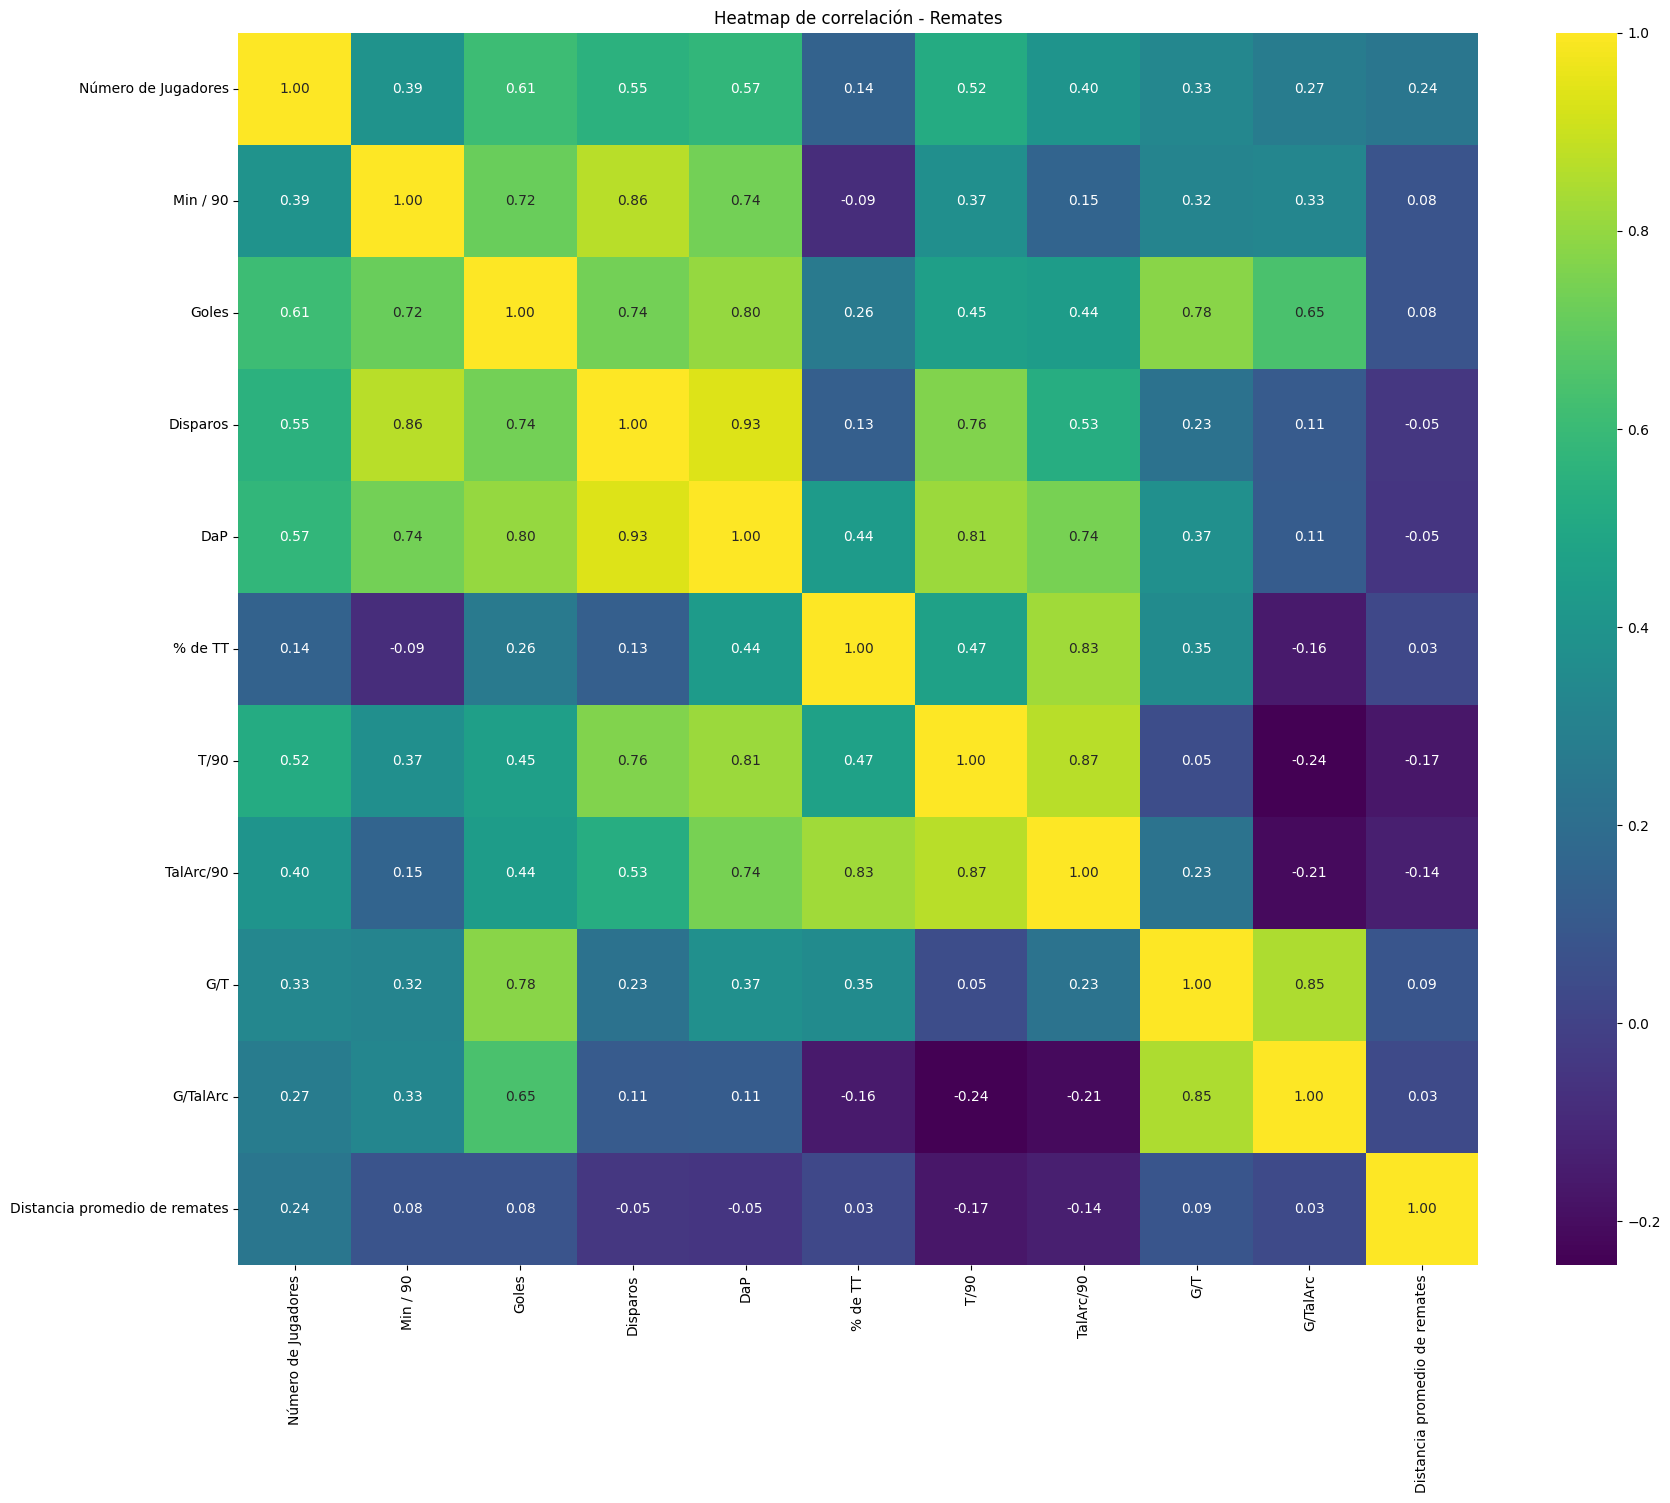

In [30]:
for key, df in dataframes_dict.items():
    try:
        # Seleccionar solo las columnas numéricas
        numeric_df = df.select_dtypes(include=[float, int])
        corr_matrix = numeric_df.corr()

        # Crear el heatmap de la matriz de correlación
        plt.figure(figsize=(20, 16))
        sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
        plt.title(f'Heatmap de correlación - {key.capitalize()}')
        plt.show()

    except Exception as e:
        print(f"Error calculando correlación para {key}: {e}")

Unificamos varios DataFrames en un solo DataFrame utilizando la función 'merge' de pandas. Este proceso se realiza de manera iterativa, fusionando cada DataFrame con el resultado acumulado de las fusiones anteriores.

In [31]:
# Comenzamos con el primer DataFrame
unificado = lista_dataframes[0]

for i, df in enumerate(lista_dataframes[1:], start=1):
    unificado = pd.merge(unificado, df, on='Equipo', how='outer', suffixes=('', f'_df{i}'))

Normalizamos las columnas numéricas de un DataFrame unificado y calculamos una puntuación total para cada equipo. Este proceso nos permite comparar los equipos en función de múltiples métricas.

In [32]:
# Seleccionar solo las columnas numéricas (excluyendo 'Equipo')
numerical_columns = unificado.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
scaler = MinMaxScaler()
unificado[numerical_columns] = scaler.fit_transform(unificado[numerical_columns])

# Sumar las puntuaciones normalizadas para cada equipo
unificado['Total Score'] = unificado[numerical_columns].sum(axis=1)

# Clasificar los equipos en función de sus puntuaciones totales
ranking = unificado[['Equipo', 'Total Score']].sort_values(by='Total Score', ascending=False)

Ranking final con todas las métricas de todos los DataFrames. España, el campeón, no sólo fue sólido en su rendimiento en el campo de juego, sino que también las estadísticas remarcaron su notoria superioridad por sobre el resto de los participantes.

In [33]:
ranking

,Equipo,Total Score
20,Spain,63.114739
9,Germany,48.086904
6,England,46.695114
14,Portugal,45.223300
12,Netherlands,40.237652
22,Türkiye,38.726335
7,France,35.876788
21,Switzerland,33.573509
1,Austria,27.681735
11,Italy,25.065814
